# Assignment B3

### Name: Shlok Kalekar
### Roll No.: 41374

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

#pip install keras.models

In [13]:
#importing the dataset
df = pd.read_csv('Churn_Modelling.csv', index_col='RowNumber')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
X_columns = df.columns.tolist()[2:12]
y_columns = df.columns.tolist()[-1:]
print(f'All columns: {df.columns.tolist()}')
print()
print(f'X values: {X_columns}')
print()
print(f'y values: {y_columns}')

All columns: ['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

X values: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

y values: ['Exited']


In [15]:
X = df[X_columns].values   # Credit Score through Estimated Salary
y = df[y_columns].values   # Exited

In [16]:
# Encoding categorical (string based) data. Country: there are 3 options: France, Spain and Germany
# This will convert those strings into scalar values for analysis

print(X[:8,1], '... will now become: ')

from sklearn.preprocessing import LabelEncoder
label_X_country_encoder = LabelEncoder()
X[:,1] = label_X_country_encoder.fit_transform(X[:,1])

print(X[:8,1])

['France' 'Spain' 'France' 'France' 'Spain' 'Spain' 'France' 'Germany'] ... will now become: 
[0 2 0 0 2 2 0 1]


In [17]:
# We will do the same thing for gender. this will be binary in this dataset

print(X[:6,2], '... will now become: ')

from sklearn.preprocessing import LabelEncoder
label_X_gender_encoder = LabelEncoder()
X[:,2] = label_X_gender_encoder.fit_transform(X[:,2])

print(X[:6,2])

['Female' 'Female' 'Female' 'Female' 'Female' 'Male'] ... will now become: 
[0 0 0 0 0 1]


In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

pipeline = Pipeline(
    [('Categorizer', ColumnTransformer(
         [ # Gender
          ("Gender Label encoder", OneHotEncoder(categories='auto', drop='first'), [2]),
           # Geography
          ("Geography One Hot", OneHotEncoder(categories='auto', drop='first'), [1])
         ], remainder='passthrough', n_jobs=1)),
     # Standard Scaler for the classifier
    ('Normalizer', StandardScaler())
    ])

In [19]:
X = pipeline.fit_transform(X)

In [20]:
# Splitting the dataset into the Training and Testing set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
print(f'training shapes: {X_train.shape}, {y_train.shape}')
print(f'testing shapes: {X_test.shape}, {y_test.shape}')

training shapes: (8000, 11), (8000, 1)
testing shapes: (2000, 11), (2000, 1)


In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

classifier = Sequential()

In [23]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
classifier.add(Dense(6, activation = 'relu', input_shape = (X_train.shape[1], )))
classifier.add(Dropout(rate=0.1))

In [24]:
# Adding the second hidden layer
# Notice that we do not need to specify input dim. 
classifier.add(Dense(6, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 

In [25]:
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
classifier.add(Dense(1, activation = 'sigmoid'))

In [26]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [27]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [28]:
history = classifier.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.1, verbose=2)

Epoch 1/200
225/225 - 1s - loss: 0.6767 - accuracy: 0.5922 - val_loss: 0.5196 - val_accuracy: 0.7937 - 783ms/epoch - 3ms/step
Epoch 2/200
225/225 - 0s - loss: 0.5196 - accuracy: 0.7749 - val_loss: 0.4582 - val_accuracy: 0.7950 - 206ms/epoch - 917us/step
Epoch 3/200
225/225 - 0s - loss: 0.4896 - accuracy: 0.7821 - val_loss: 0.4407 - val_accuracy: 0.7950 - 204ms/epoch - 905us/step
Epoch 4/200
225/225 - 0s - loss: 0.4743 - accuracy: 0.7869 - val_loss: 0.4313 - val_accuracy: 0.8000 - 197ms/epoch - 874us/step
Epoch 5/200
225/225 - 0s - loss: 0.4666 - accuracy: 0.7907 - val_loss: 0.4260 - val_accuracy: 0.8000 - 200ms/epoch - 888us/step
Epoch 6/200
225/225 - 0s - loss: 0.4601 - accuracy: 0.7971 - val_loss: 0.4201 - val_accuracy: 0.8050 - 191ms/epoch - 849us/step
Epoch 7/200
225/225 - 0s - loss: 0.4584 - accuracy: 0.7990 - val_loss: 0.4136 - val_accuracy: 0.8112 - 196ms/epoch - 873us/step
Epoch 8/200
225/225 - 0s - loss: 0.4508 - accuracy: 0.8010 - val_loss: 0.4089 - val_accuracy: 0.8100 - 191

Epoch 65/200
225/225 - 0s - loss: 0.3736 - accuracy: 0.8431 - val_loss: 0.3354 - val_accuracy: 0.8525 - 218ms/epoch - 971us/step
Epoch 66/200
225/225 - 0s - loss: 0.3707 - accuracy: 0.8438 - val_loss: 0.3331 - val_accuracy: 0.8562 - 204ms/epoch - 905us/step
Epoch 67/200
225/225 - 0s - loss: 0.3660 - accuracy: 0.8475 - val_loss: 0.3353 - val_accuracy: 0.8525 - 210ms/epoch - 933us/step
Epoch 68/200
225/225 - 0s - loss: 0.3760 - accuracy: 0.8417 - val_loss: 0.3380 - val_accuracy: 0.8487 - 214ms/epoch - 951us/step
Epoch 69/200
225/225 - 0s - loss: 0.3700 - accuracy: 0.8450 - val_loss: 0.3351 - val_accuracy: 0.8575 - 199ms/epoch - 886us/step
Epoch 70/200
225/225 - 0s - loss: 0.3679 - accuracy: 0.8483 - val_loss: 0.3372 - val_accuracy: 0.8500 - 209ms/epoch - 927us/step
Epoch 71/200
225/225 - 0s - loss: 0.3709 - accuracy: 0.8482 - val_loss: 0.3348 - val_accuracy: 0.8575 - 193ms/epoch - 858us/step
Epoch 72/200
225/225 - 0s - loss: 0.3690 - accuracy: 0.8471 - val_loss: 0.3352 - val_accuracy: 0.

Epoch 129/200
225/225 - 0s - loss: 0.3656 - accuracy: 0.8478 - val_loss: 0.3399 - val_accuracy: 0.8500 - 199ms/epoch - 883us/step
Epoch 130/200
225/225 - 0s - loss: 0.3661 - accuracy: 0.8475 - val_loss: 0.3368 - val_accuracy: 0.8537 - 193ms/epoch - 858us/step
Epoch 131/200
225/225 - 0s - loss: 0.3666 - accuracy: 0.8449 - val_loss: 0.3363 - val_accuracy: 0.8525 - 196ms/epoch - 872us/step
Epoch 132/200
225/225 - 0s - loss: 0.3679 - accuracy: 0.8492 - val_loss: 0.3368 - val_accuracy: 0.8500 - 197ms/epoch - 873us/step
Epoch 133/200
225/225 - 0s - loss: 0.3679 - accuracy: 0.8475 - val_loss: 0.3376 - val_accuracy: 0.8500 - 198ms/epoch - 882us/step
Epoch 134/200
225/225 - 0s - loss: 0.3619 - accuracy: 0.8475 - val_loss: 0.3380 - val_accuracy: 0.8487 - 194ms/epoch - 864us/step
Epoch 135/200
225/225 - 0s - loss: 0.3644 - accuracy: 0.8479 - val_loss: 0.3380 - val_accuracy: 0.8525 - 198ms/epoch - 880us/step
Epoch 136/200
225/225 - 0s - loss: 0.3687 - accuracy: 0.8467 - val_loss: 0.3365 - val_accu

225/225 - 0s - loss: 0.3649 - accuracy: 0.8489 - val_loss: 0.3375 - val_accuracy: 0.8512 - 197ms/epoch - 876us/step
Epoch 193/200
225/225 - 0s - loss: 0.3638 - accuracy: 0.8474 - val_loss: 0.3376 - val_accuracy: 0.8512 - 193ms/epoch - 857us/step
Epoch 194/200
225/225 - 0s - loss: 0.3627 - accuracy: 0.8496 - val_loss: 0.3378 - val_accuracy: 0.8525 - 197ms/epoch - 876us/step
Epoch 195/200
225/225 - 0s - loss: 0.3640 - accuracy: 0.8500 - val_loss: 0.3378 - val_accuracy: 0.8525 - 199ms/epoch - 887us/step
Epoch 196/200
225/225 - 0s - loss: 0.3643 - accuracy: 0.8510 - val_loss: 0.3405 - val_accuracy: 0.8487 - 199ms/epoch - 882us/step
Epoch 197/200
225/225 - 0s - loss: 0.3655 - accuracy: 0.8458 - val_loss: 0.3366 - val_accuracy: 0.8512 - 197ms/epoch - 875us/step
Epoch 198/200
225/225 - 0s - loss: 0.3657 - accuracy: 0.8485 - val_loss: 0.3397 - val_accuracy: 0.8487 - 197ms/epoch - 878us/step
Epoch 199/200
225/225 - 0s - loss: 0.3671 - accuracy: 0.8478 - val_loss: 0.3392 - val_accuracy: 0.8500 -

In [29]:
type(history)

keras.callbacks.History

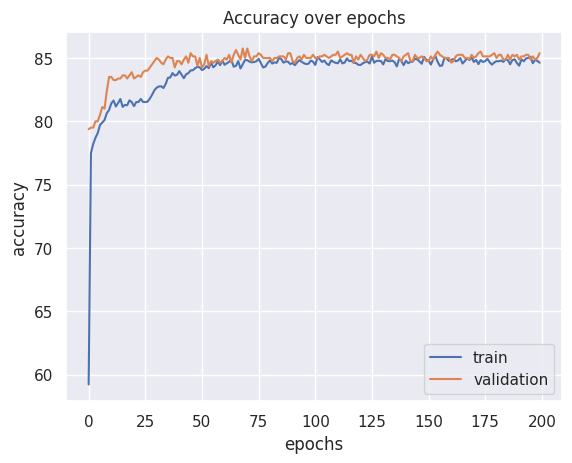

In [30]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

In [31]:
y_pred = classifier.predict(X_test)
print(y_pred[:5])

63/63 [==============================] - 0s 695us/step
[[0.25320563]
 [0.22720478]
 [0.14708437]
 [0.1349023 ]
 [0.11795811]]


In [32]:
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1572   23]
 [ 246  159]]


In [34]:
print (((cm[0][0]+cm[1][1])*100)/(len(y_test)), '% of testing data was classified correctly')

86.55 % of testing data was classified correctly
